In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Mobile_data.csv")

In [4]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [6]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [7]:
print("*********************************SC_W:-Screen width of phone cannot be zero***********************************")

*********************************SC_W:-Screen width of phone cannot be zero***********************************


In [8]:
df.loc[:,"sc_w"].replace([0],[df["sc_w"].mean()],inplace=True)

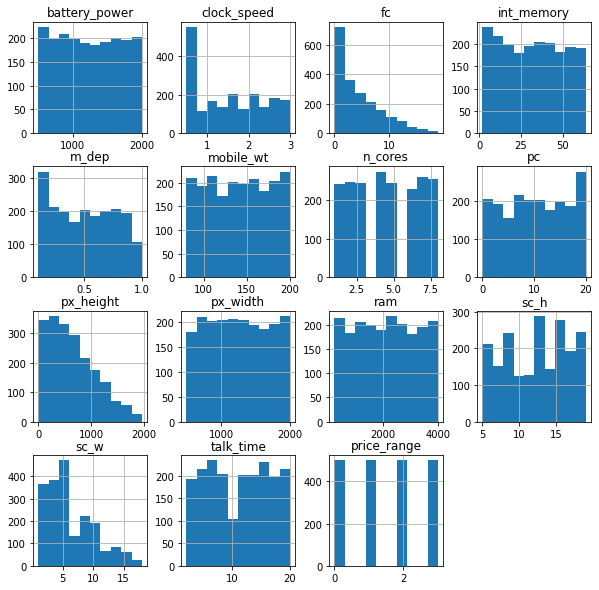

In [9]:
p=df.hist(figsize=(10,10))

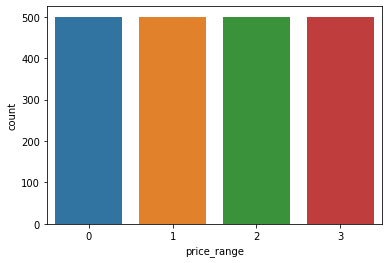

In [10]:
sns.countplot(df["price_range"])
plt.show()

<AxesSubplot:>

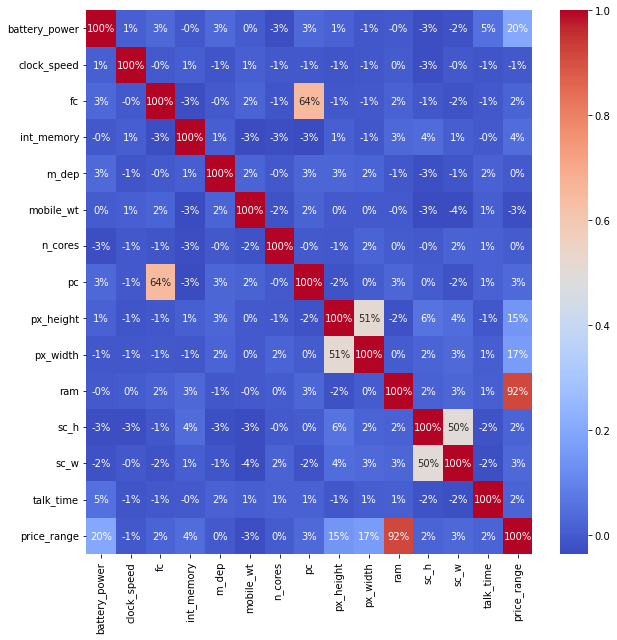

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".0%")

# SPILITING DATA.

In [12]:
X=df.drop("price_range",axis=1)
y=df["price_range"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)

# FEATURE SCALING.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc=StandardScaler()

In [17]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# MODEL BUILDING.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
from sklearn.metrics import classification_report,f1_score,confusion_matrix,recall_score

In [20]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
print("Train Data")
print(classification_report(y_train,y_pred_train))
print("Test Data")
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       412
           1       0.62      0.69      0.65       402
           2       0.68      0.68      0.68       386
           3       0.92      0.77      0.84       400

    accuracy                           0.75      1600
   macro avg       0.76      0.75      0.75      1600
weighted avg       0.76      0.75      0.75      1600

Test Data
              precision    recall  f1-score   support

           0       0.64      0.85      0.73        88
           1       0.45      0.51      0.48        98
           2       0.60      0.47      0.53       114
           3       0.77      0.63      0.69       100

    accuracy                           0.60       400
   macro avg       0.61      0.62      0.61       400
weighted avg       0.61      0.60      0.60       400



# HYPER PARAMETER TUNING.

In [21]:
param_grid={"n_neighbors":np.arange(1,15),"weights":["uniform","distance"],"metric":["minkowski","manhattan","euclidean"]}

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
grid_clf=GridSearchCV(clf,param_grid=param_grid,scoring="f1",cv=5,n_jobs=-1)
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [24]:
grid_clf.best_params_

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}

In [25]:
grid_clf.best_score_

nan

In [26]:
grid_train_pred=grid_clf.predict(X_train)
grid_test_pred=grid_clf.predict(X_test)

In [27]:
print("Train data")
print(classification_report(y_train,grid_train_pred))
print(classification_report(y_test,grid_test_pred))

Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       402
           2       1.00      1.00      1.00       386
           3       1.00      1.00      1.00       400

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

              precision    recall  f1-score   support

           0       0.64      0.65      0.64        88
           1       0.41      0.48      0.44        98
           2       0.49      0.43      0.46       114
           3       0.71      0.67      0.69       100

    accuracy                           0.55       400
   macro avg       0.56      0.56      0.56       400
weighted avg       0.56      0.55      0.55       400



In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 45


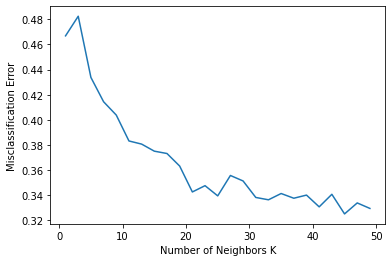

In [30]:
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=45)
# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print("accuracy: {}".format(accuracy_score(y_test, pred)))

accuracy: 0.665
